In [1]:
# Generamos datos de juguete
import numpy as np
import pandas as pd

alturas = np.random.normal(1.7, 0.1, 1000)
dni = np.random.randint(10, size=1000)
impar = dni%2

data = pd.DataFrame({"alturas_m":alturas,"alturas_cm":alturas*100,"dni":dni,"y":impar})

In [2]:
data.head()

,alturas_m,alturas_cm,dni,y
0,1.809231,180.923070,8,0
1,1.461876,146.187594,2,0
2,1.660207,166.020681,2,0
3,1.948037,194.803747,9,1
4,1.672508,167.250797,2,0


In [3]:
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='dni', ylabel='alturas_m'>

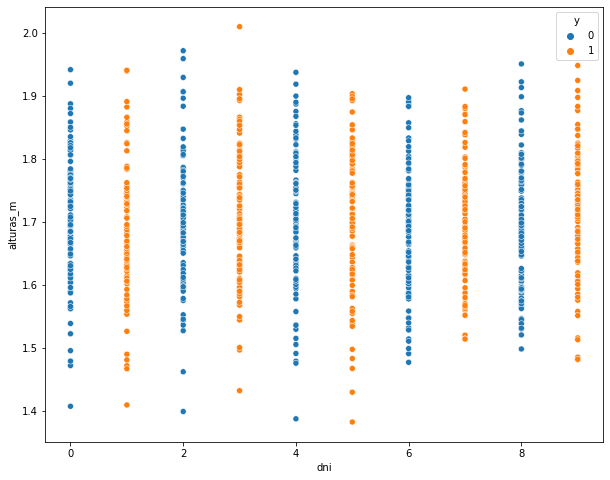

In [4]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
sns.scatterplot(x='dni', y='alturas_m', data=data, hue='y')

<AxesSubplot:xlabel='dni', ylabel='alturas_cm'>

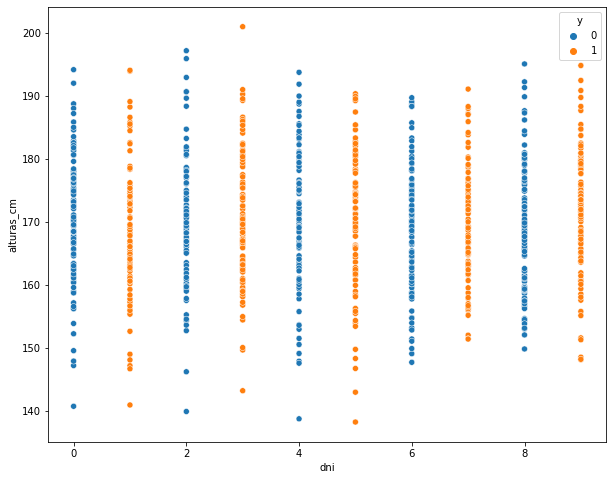

In [5]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
sns.scatterplot(x='dni', y='alturas_cm', data=data, hue='y')

(-0.45, 9.45, 1.350705358250598, 2.041044383153972)

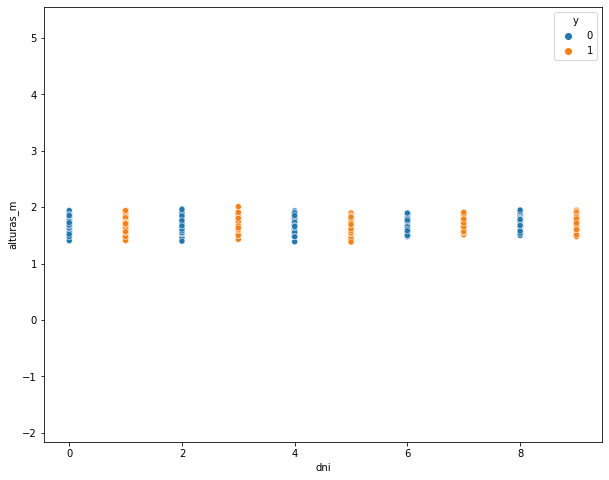

In [6]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
g = sns.scatterplot(x='dni', y='alturas_m', data=data, hue='y')
g.axis("equal")

(-0.45, 9.45, 135.07053582505978, 204.10443831539718)

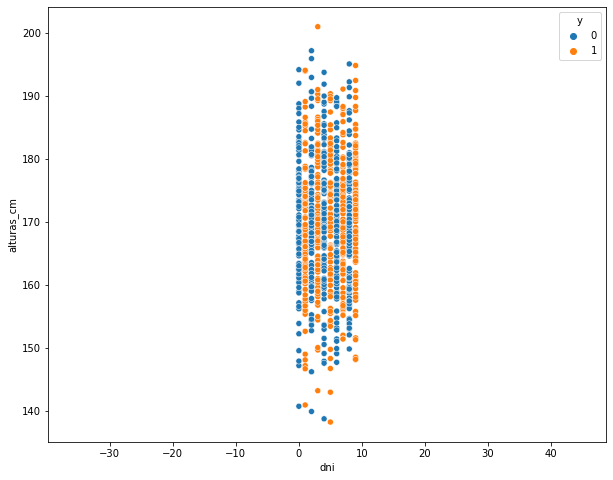

In [7]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
g = sns.scatterplot(x='dni', y='alturas_cm', data=data, hue='y')
g.axis("equal")


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

normalizar = True

cm = True

if cm:
    data_renamed = data.rename(columns={"dni":"x2","alturas_cm":"x1"})
    X_train, X_test, y_train, y_test = train_test_split(data_renamed.drop(['y',"alturas_m"], axis=1), data_renamed['y'])
else:
    data_renamed = data.rename(columns={"dni":"x2","alturas_m":"x1"})
    X_train, X_test, y_train, y_test = train_test_split(data_renamed.drop(['y',"alturas_cm"], axis=1), data_renamed['y'])

if normalizar:
    scaler = StandardScaler()
    X_train[['x1', 'x2']] = scaler.fit_transform(X_train)


knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

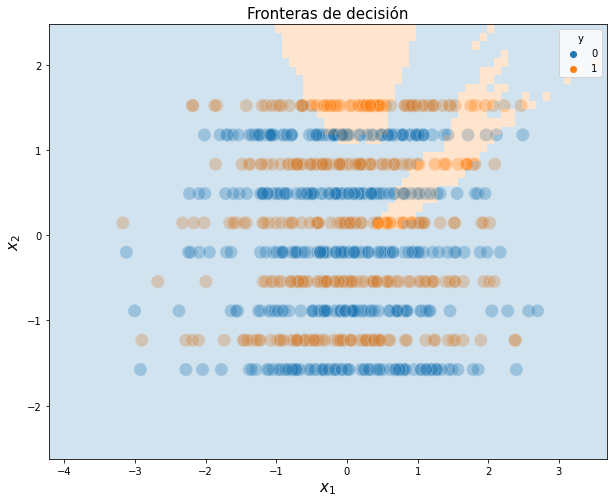

In [25]:
# Definimos el tamaño de la figura
plt.figure(figsize=(10,8))

# Visualizamos los datos de entrenamiento
sns.scatterplot(x=X_train['x1'], y=X_train['x2'], hue=y_train, alpha=0.3, s=175)

# Definimos una grilla de valores que abarcan todo el rango de cada variable
x1_min, x1_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
x2_min, x2_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, .1), np.arange(x2_min, x2_max, .1))

# Predecimos a partir de los valores de la grilla
Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

# Representamos las áreas de influencia de cada clase
plt.pcolormesh(x1, x2, Z, cmap = ListedColormap(sns.color_palette(n_colors=2)), alpha=0.2, shading='auto')

# Definimos los rótulos del gráfico
plt.xlabel(f'$x_1$', fontsize=15)
plt.ylabel(f'$x_2$', fontsize=15)
plt.title('Fronteras de decisión', fontsize=15);